## Description:
> 通过这个项目，看一下聚类分析， 聚类分析是研究分类问题的一种统计分析方法，也是数据挖掘的一种重要方法。
>
> 聚类分析是若干模式组成的， 通常，模式是一个度量向量， 或者是多维空间中的一个点。
>
> 聚类分析以相似性为基础， 在一个聚类中的模式之间比不在同一个聚类中的模式之间有更多的相似性
> 
> 该项目中使用的数据集： http://archive.ics.uci.edu/ml/datasets/Wine
>
> 这个数据集包含13个数据特征， 并且数据被分为三个类别， 通过KMean算法自动聚类

In [8]:
# 导入包
from pandas import read_csv
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [4]:
# 导入数据
filename = 'wine.data.csv'
names = ['class', 'Alcohol', 'MalicAcid', 'Ash', 'AlclinityOfAsh', 'Magnesium', 'TotalPhenols', 'Flavanoids', 
        'NonflayanoidPhenols', 'Proanthocynins', 'ColorIntensiyt', 'Hue', 'OD280/OD315', 'Proline']

dataset = read_csv(filename, names=names)
dataset['class'] = dataset['class'].replace(to_replace=[1, 2, 3], value=[0, 1, 2])
array = dataset.values
X = array[:, 1:13]
y = array[:, 0]

In [5]:
# 数据降维
pca = PCA(n_components=3)
X_scale = StandardScaler().fit_transform(X)
X_reduce = pca.fit_transform(scale(X_scale))

0.735  0.731  0.733  0.740  0.728  0.413


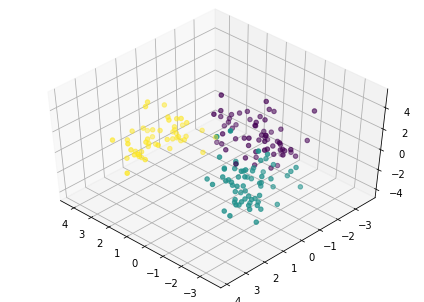

In [9]:
# 模型训练
model = KMeans(n_clusters=3)
model.fit(X_reduce)
labels = model.labels_

# 输出模型的准确度
print('%.3f  %.3f  %.3f  %.3f  %.3f  %.3f' % (
    metrics.homogeneity_score(y, labels),
    metrics.completeness_score(y, labels),
    metrics.v_measure_score(y, labels),
    metrics.adjusted_rand_score(y, labels),
    metrics.adjusted_mutual_info_score(y, labels),
    metrics.silhouette_score(X_reduce, labels)))

# 绘制模型的分布图
fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], X_reduce[:, 2], c=labels.astype(np.float))
plt.show()